In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as mlp
import seaborn as sns

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/Data/dataset.csv")
data.head()

<ipython-input-3-b0fe803a9bdd>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"/content/drive/MyDrive/Data/dataset.csv")


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
data.shape

(958524, 45)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [6]:
data.pha.unique()

array(['N', 'Y', nan], dtype=object)

In [7]:
data.isnull().sum()/data.shape[0]*100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

In [8]:
data.duplicated().sum()

0

In [9]:
data = data.dropna(subset=["rms", "moid_ld", "per_y", "per", "ad", "ma", "H", "neo", "sigma_e", "moid", "sigma_a", "sigma_q", "sigma_i"])
data.drop = ["name", "class", "rms", "per", "tp_cal", "tp", "ma", "diameter", "albedo", "diameter_sigma", "orbit_id", "prefix", "full_name", "epoch"]
data1 = data[['H','epoch','e','a','q','i','om','w','ad','n','pha']]

In [10]:
data1.head()

,H,epoch,e,a,q,i,om,w,ad,n,pha
0,3.40,2458600.5,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,2.979647,0.213885,N
1,4.20,2459000.5,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,3.411748,0.213345,N
2,5.33,2459000.5,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,3.353865,0.226129,N
3,3.00,2458600.5,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,2.570926,0.271609,N
4,6.90,2459000.5,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,3.065455,0.238661,N


In [11]:
data1["pha"].value_counts()

N    930269
Y      2066
Name: pha, dtype: int64

In [12]:
data1.describe()

,H,epoch,e,a,q,i,om,w,ad,n
count,932335.000000,9.323350e+05,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,9.323350e+05
mean,16.890009,2.458895e+06,0.156221,2.932576,2.398889,8.996685,168.395504,181.381528,3.466264,2.366079e-01
std,1.801243,6.439097e+02,0.093001,36.458214,2.165155,6.606939,102.863983,103.910012,72.768238,7.998658e-02
min,-1.100000,2.425052e+06,0.000003,0.555418,0.070511,0.007744,0.000025,0.000130,0.653773,1.608247e-07
25%,16.000000,2.459000e+06,0.092159,2.389088,1.972209,4.135562,80.528010,91.490632,2.783886,1.893978e-01
50%,16.900000,2.459000e+06,0.144933,2.647971,2.227213,7.357845,159.871187,182.353840,3.048692,2.287359e-01
75%,17.700000,2.459000e+06,0.200589,3.002982,2.580130,12.332702,251.974383,271.551596,3.365569,2.669045e-01
max,33.200000,2.459000e+06,0.999851,33488.895955,80.398819,175.082901,359.999793,359.999646,66972.796064,2.381082e+00


In [13]:
data1.shape

(932335, 11)

<Axes: xlabel='pha', ylabel='Count'>

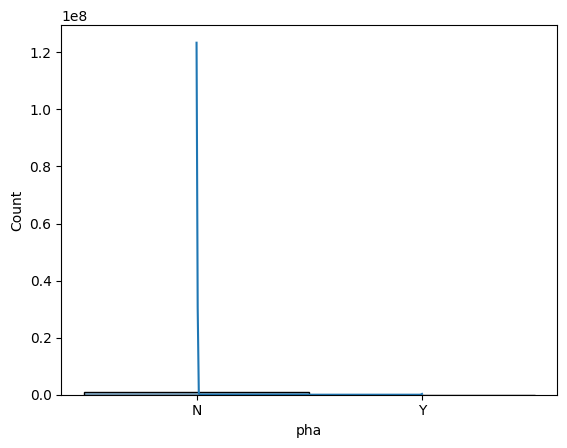

In [14]:
sns.histplot(data1["pha"],kde=True)

In [15]:
data1

,H,epoch,e,a,q,i,om,w,ad,n,pha
0,3.400,2458600.5,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,2.979647,0.213885,N
1,4.200,2459000.5,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,3.411748,0.213345,N
2,5.330,2459000.5,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,3.353865,0.226129,N
3,3.000,2458600.5,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,2.570926,0.271609,N
4,6.900,2459000.5,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,3.065455,0.238661,N
...,...,...,...,...,...,...,...,...,...,...,...
958519,17.135,2437203.5,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,2.704916,0.286125,N
958520,18.500,2459000.5,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,2.995502,0.276248,N
958521,20.400,2459000.5,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,4.683363,0.208444,Y
958522,18.071,2441956.5,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,2.852636,0.269600,N


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932335 entries, 0 to 958523
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   H       932335 non-null  float64
 1   epoch   932335 non-null  float64
 2   e       932335 non-null  float64
 3   a       932335 non-null  float64
 4   q       932335 non-null  float64
 5   i       932335 non-null  float64
 6   om      932335 non-null  float64
 7   w       932335 non-null  float64
 8   ad      932335 non-null  float64
 9   n       932335 non-null  float64
 10  pha     932335 non-null  object 
dtypes: float64(10), object(1)
memory usage: 85.4+ MB


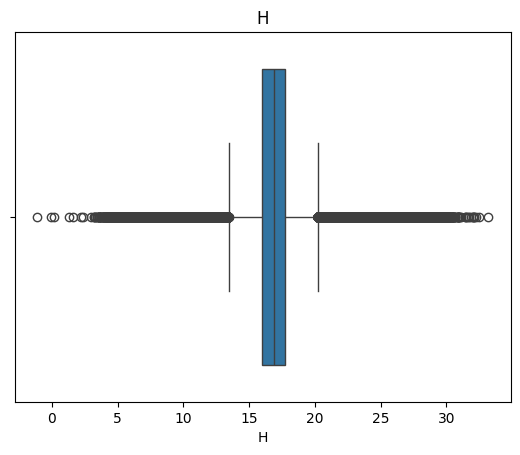

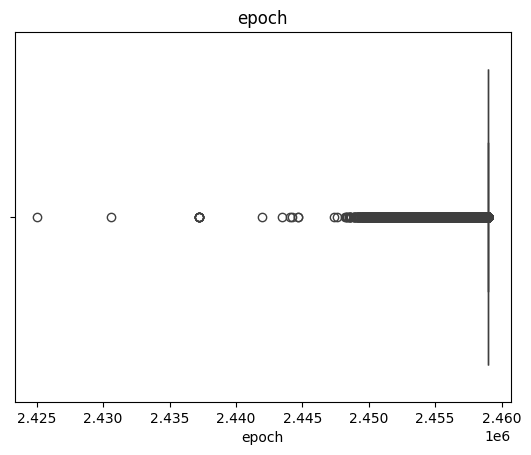

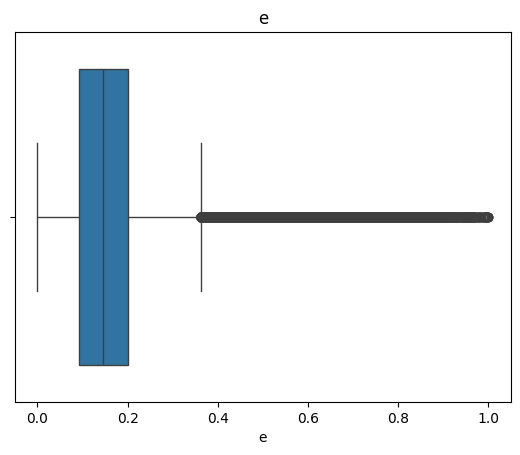

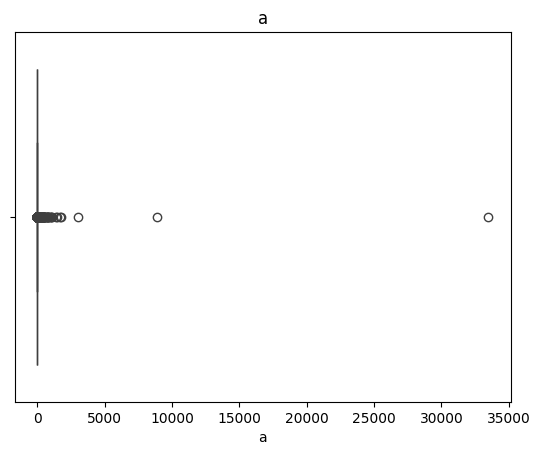

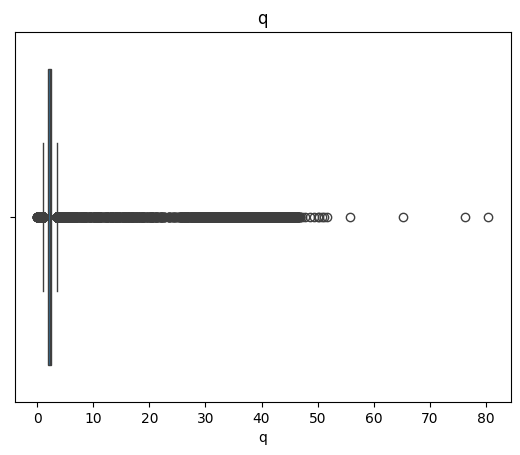

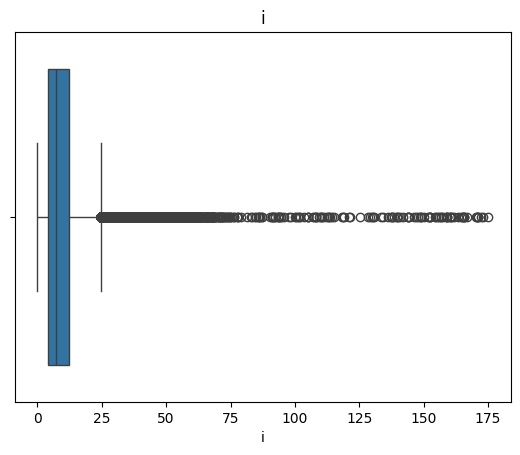

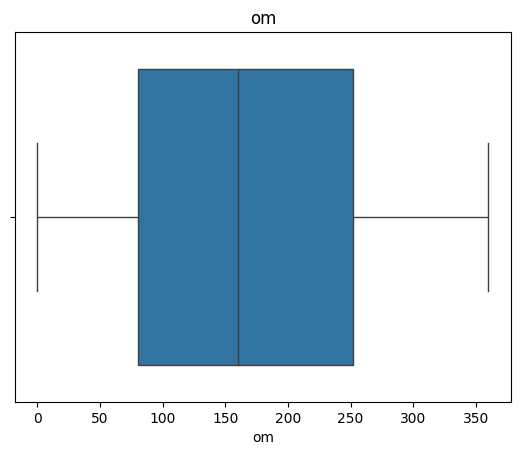

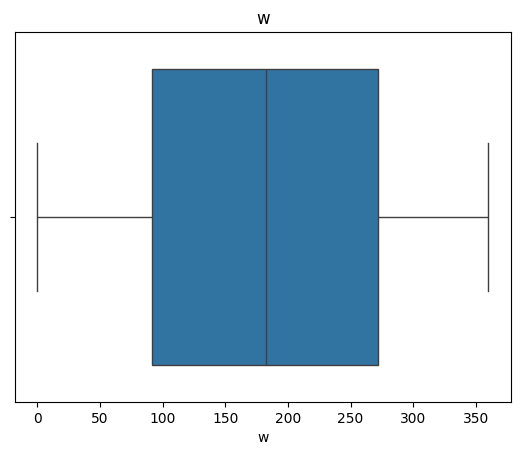

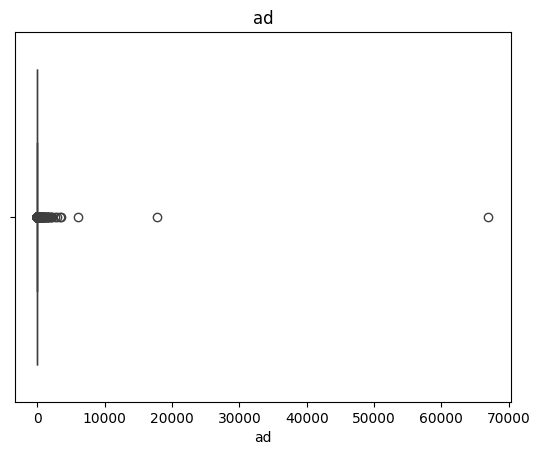

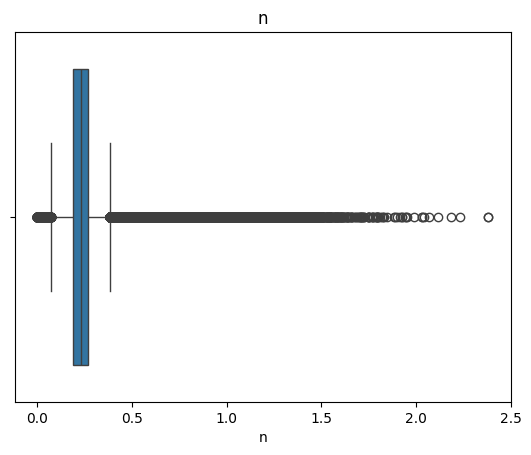

In [17]:
for i in data1.columns:
  if (data1[i].dtype)=='float64':
    boxplot = sns.boxplot(x=data1[i])
    mlp.title(i)
    mlp.show()

In [18]:
data1['n'] = np.where(data1['n']>0.4,0.4,data1['n'])

<ipython-input-18-6524e23ddafb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['n'] = np.where(data1['n']>0.4,0.4,data1['n'])


In [19]:
data1['n'] = np.where(data1['n']<0.1,0.1,data1['n'])

<ipython-input-19-4eda23f0e69e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['n'] = np.where(data1['n']<0.1,0.1,data1['n'])


In [20]:
data1['ad'] = np.where(data1['ad']>2,2,data1['ad'])

<ipython-input-20-3d3ff0c7558c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ad'] = np.where(data1['ad']>2,2,data1['ad'])


In [21]:
data1['ad'] = np.where(data1['ad']<4,4,data1['ad'])

<ipython-input-21-6aa0dffae50b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ad'] = np.where(data1['ad']<4,4,data1['ad'])


In [22]:
data1['w'] = np.where(data1['w']>80,80,data1['w'])

<ipython-input-22-546fbd704319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['w'] = np.where(data1['w']>80,80,data1['w'])


In [23]:
data1['w'] = np.where(data1['w']<270,270,data1['w'])

<ipython-input-23-711265f40d0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['w'] = np.where(data1['w']<270,270,data1['w'])


In [24]:
data1['om'] = np.where(data1['om']>90,90,data1['om'])

<ipython-input-24-07e2d96ea9c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['om'] = np.where(data1['om']>90,90,data1['om'])


In [25]:
data1['om'] = np.where(data1['om']<260,260,data1['om'])

<ipython-input-25-dec8d7210317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['om'] = np.where(data1['om']<260,260,data1['om'])


In [26]:
data1['i'] = np.where(data1['i']<24,24,data1['i'])

<ipython-input-26-e83af8444505>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['i'] = np.where(data1['i']<24,24,data1['i'])


In [27]:
data1['i'] = np.where(data1['i']>1,1,data1['i'])

<ipython-input-27-55d232e9ddcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['i'] = np.where(data1['i']>1,1,data1['i'])


In [28]:
data1['q'] = np.where(data1['q']<3,3,data1['q'])

<ipython-input-28-08efd69ccab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['q'] = np.where(data1['q']<3,3,data1['q'])


In [29]:
data1['q'] = np.where(data1['q']>1,1,data1['q'])

<ipython-input-29-df10e522ba32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['q'] = np.where(data1['q']>1,1,data1['q'])


In [30]:
data1['a'] = np.where(data1['a']>1,1,data1['a'])

<ipython-input-30-686fd6539f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['a'] = np.where(data1['a']>1,1,data1['a'])


In [31]:
data1['a'] = np.where(data1['a']<1,1,data1['a'])

<ipython-input-31-539c1773e6f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['a'] = np.where(data1['a']<1,1,data1['a'])


In [32]:
data1['e'] = np.where(data1['e']>0.12,0.12,data1['e'])

<ipython-input-32-9493b0b01d79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['e'] = np.where(data1['e']>0.12,0.12,data1['e'])


In [33]:
data1['e'] = np.where(data1['e']<0.2,0.2,data1['e'])

<ipython-input-33-79212a225fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['e'] = np.where(data1['e']<0.2,0.2,data1['e'])


In [34]:
data1['epoch'] = np.where(data1['epoch']>0.2549,0.2549,data1['epoch'])

<ipython-input-34-eb3a790576fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['epoch'] = np.where(data1['epoch']>0.2549,0.2549,data1['epoch'])


In [35]:
data1['epoch'] = np.where(data1['epoch']<0.2549,0.2549,data1['epoch'])

<ipython-input-35-ddbc33d689b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['epoch'] = np.where(data1['epoch']<0.2549,0.2549,data1['epoch'])


In [36]:
data1['H'] = np.where(data1['H']>17,17,data1['H'])

<ipython-input-36-0033547cc901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['H'] = np.where(data1['H']>17,17,data1['H'])


In [37]:
data1['H'] = np.where(data1['H']<13,13,data1['H'])

<ipython-input-37-82ef1b72c507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['H'] = np.where(data1['H']<13,13,data1['H'])


In [ ]:
# x=data1[["pha"]]
# y=data1.drop("pha",axis=1)

In [38]:
# disable chained assignments
pd.options.mode.chained_assignment = None

In [49]:
y=data1[["pha"]]
x=data1.drop("pha",axis=1)

In [52]:
data1['pha'] = data1['pha'].map({'Y':1, 'N':0})

In [50]:
x.head(2)

,H,epoch,e,a,q,i,om,w,ad,n
0,13.0,0.2549,0.2,1.0,1.0,1.0,260.0,270.0,4.0,0.213885
1,13.0,0.2549,0.2,1.0,1.0,1.0,260.0,270.0,4.0,0.213345


In [45]:
y.head(2)

,pha
0,0
1,0


In [51]:
y["pha"].value_counts()

N    930269
Y      2066
Name: pha, dtype: int64

##ML MODELS

In [80]:
data=data1.copy()

In [54]:
data.head(2)

,H,epoch,e,a,q,i,om,w,ad,n,pha
0,13.0,0.2549,0.2,1.0,1.0,1.0,260.0,270.0,4.0,0.213885,0
1,13.0,0.2549,0.2,1.0,1.0,1.0,260.0,270.0,4.0,0.213345,0


In [63]:
import numpy as np
import pandas as pd

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import all required Libraries:

import matplotlib.pyplot as plt
import re
import time


from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression




##using undersampling to blance the data imbalance

In [92]:
X = data.iloc[:, data.columns != 'pha']
y = data.iloc[:, data.columns == 'pha']

number_records_fraud = len (data[data.pha==1])


fraud_indices = np.array (data[data.pha==1].index)
normal_indices = np.array (data[data.pha==0].index)


random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])


under_sample_data = data.loc[under_sample_indices,:]

X_undersample = under_sample_data.loc [:, under_sample_data.columns != 'pha'];
y_undersample = under_sample_data.loc [:, under_sample_data.columns == 'pha'];


from sklearn.model_selection import train_test_split
#X_train_old, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [93]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (2892, 10)
Number of data points in test data : (1240, 10)


In [94]:
y_train['pha'].value_counts()

0    1466
1    1426
Name: pha, dtype: int64

In [95]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)




In [96]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column


    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row

    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

Log loss on Test Data using Random Model 0.8816113859931011


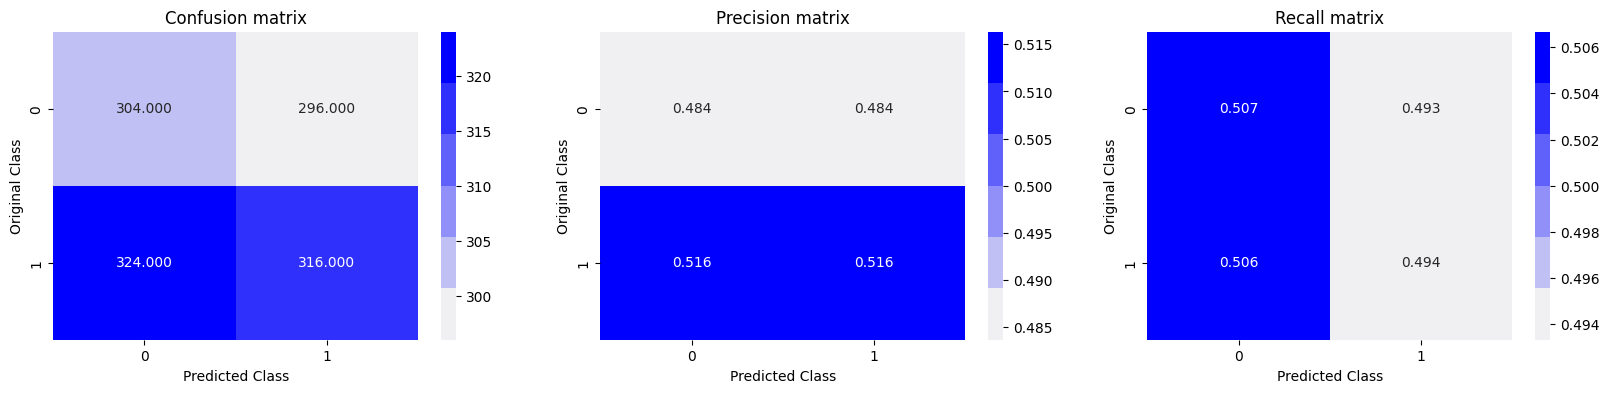

In [97]:
import numpy as np
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

#Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.3723214875718015
For values of alpha =  0.0001 The log loss is: 0.3729624601571498
For values of alpha =  0.001 The log loss is: 0.3729764638101053
For values of alpha =  0.01 The log loss is: 0.3732213842660232
For values of alpha =  0.1 The log loss is: 0.3740070047555287
For values of alpha =  1 The log loss is: 0.37333816060968367
For values of alpha =  10 The log loss is: 0.37310791367925866


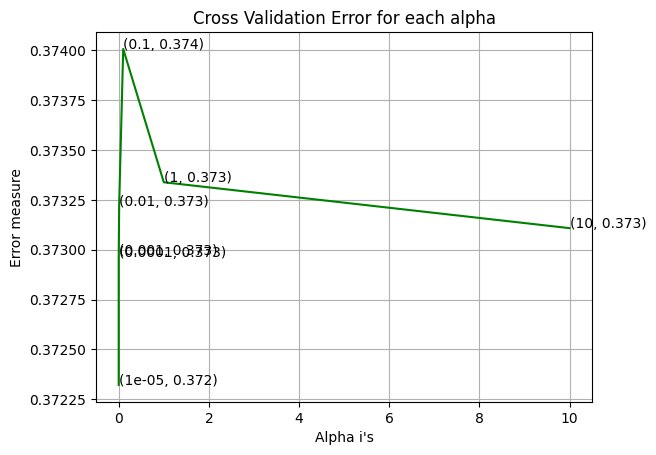

For values of best alpha =  1e-05 The train log loss is: 0.3725323408816579
For values of best alpha =  1e-05 The test log loss is: 0.3723214875718015
Total number of data points : 1240


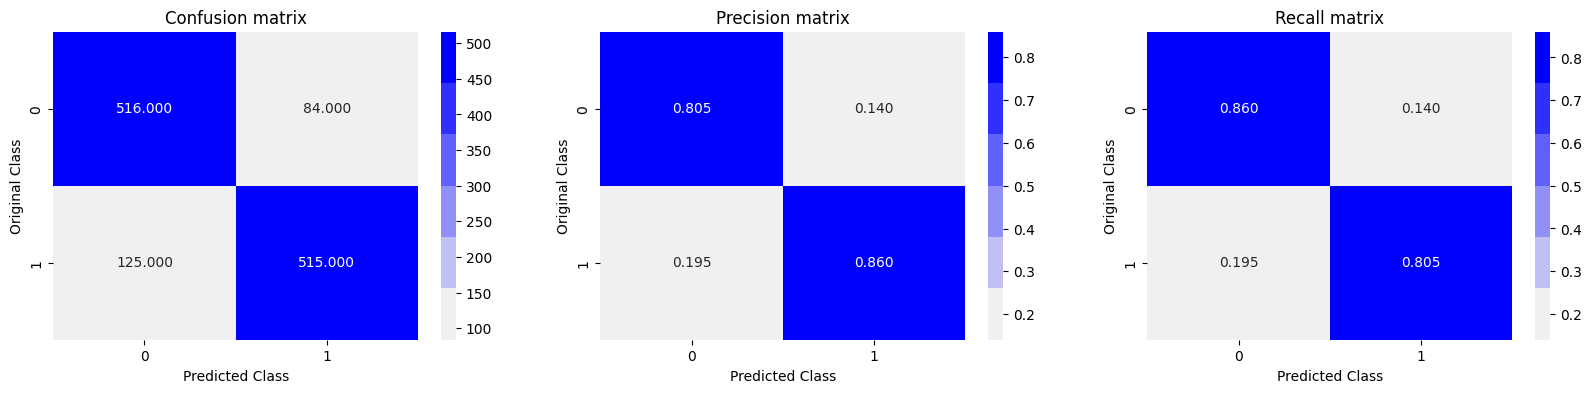

In [98]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.37381438113378856
For values of alpha =  0.0001 The log loss is: 0.3751027208503134
For values of alpha =  0.001 The log loss is: 0.37566231277950657
For values of alpha =  0.01 The log loss is: 0.3777843759728955
For values of alpha =  0.1 The log loss is: 0.3973446838064625
For values of alpha =  1 The log loss is: 0.6936890099798975
For values of alpha =  10 The log loss is: 0.6936890099982869


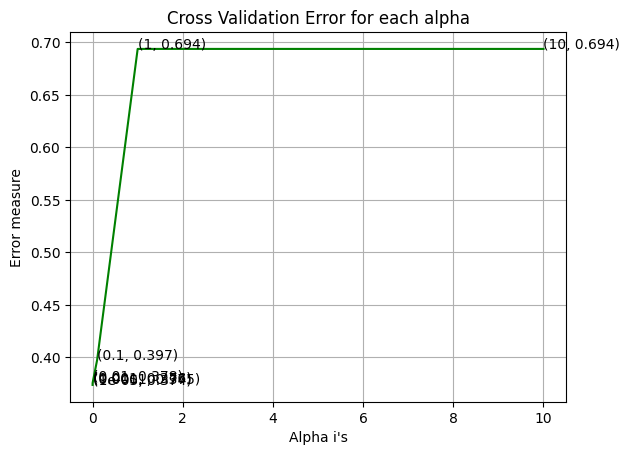

For values of best alpha =  1e-05 The train log loss is: 0.3727242332274821
For values of best alpha =  1e-05 The test log loss is: 0.37381438113378856
Total number of data points : 1240


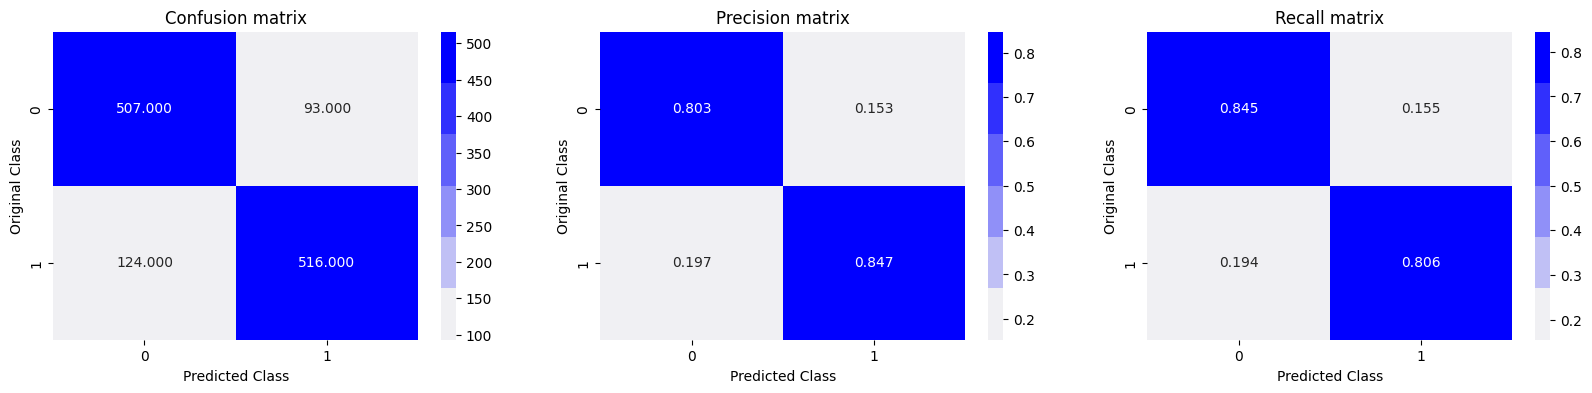

In [102]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [103]:
import pickle
pickle.dump(sig_clf, open('/content/drive/MyDrive/final_prediction.pickle', 'wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/scaler.pickle', 'wb'))